In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [2]:
train_triples = pd.read_csv('../ELs_for_Rotate/Monarch_KG/train.txt', sep='\t', header=None)
train_triples.columns = ['subject', 'predicate', 'object']
print(train_triples.head())

      subject               predicate         object
0  HGNC:16391          biolink:causes  MONDO:0008905
1  HGNC:21066          biolink:causes  MONDO:0009544
2  HGNC:14313          biolink:causes  MONDO:0033485
3   HGNC:6742          biolink:causes  MONDO:0014693
4  HGNC:10939  biolink:contributes_to  MONDO:0014092


In [3]:
print(train_triples['predicate'].unique())
print('Number of relations:',len(train_triples['predicate'].unique()))

['biolink:causes' 'biolink:contributes_to'
 'biolink:gene_associated_with_condition' 'biolink:has_phenotype'
 'biolink:interacts_with' 'biolink:participates_in' 'biolink:expressed_in'
 'biolink:enables' 'biolink:actively_involved_in' 'biolink:active_in'
 'biolink:acts_upstream_of_or_within' 'biolink:colocalizes_with'
 'biolink:located_in' 'biolink:part_of' 'biolink:acts_upstream_of'
 'biolink:acts_upstream_of_or_within_negative_effect'
 'biolink:acts_upstream_of_negative_effect'
 'biolink:acts_upstream_of_positive_effect'
 'biolink:acts_upstream_of_or_within_positive_effect'
 'biolink:orthologous_to' 'biolink:subclass_of' 'biolink:related_to'
 'biolink:has_mode_of_inheritance']
Number of relations: 23


In [4]:
for x in train_triples['object']:
    # if x is float print it
    if isinstance(x, float):
        print(x)

In [5]:
# how many node types are there?
train_triples['subject_type'] = [':'.join(x.split(':')[:-1]) for x in train_triples['subject']]
print('Number of subject types:', len(train_triples['subject_type'].unique()))
print(train_triples['subject_type'].unique())
train_triples['object_type'] = [':'.join(x.split(':')[:-1]) for x in train_triples['object']]
print('Number of object types:', len(train_triples['object_type'].unique()))
print(train_triples['subject_type'].unique())

all_node_types = list(train_triples['subject_type'].unique()) + list(train_triples['object_type'].unique())
print('Number of node types:', len(set(all_node_types)))
print(set(all_node_types))

Number of subject types: 46
['HGNC' 'PomBase' 'MONDO' 'WB' 'MGI' 'RGD' 'FB' 'NCBIGene' 'Xenbase'
 'ZFIN' 'SGD' 'dictyBase' 'PR' 'BFO' 'CHEBI' 'CL' 'ECO' 'EMAPA' 'ENVO'
 'FAO' 'FBbt' 'FMA' 'FYPO' 'GO' 'HP' 'HSAPDV' 'IAO' 'MA' 'MPATH' 'MP'
 'NBO' 'NCBITaxon' 'OBI' 'OGMS' 'PATO' 'PO' 'RO' 'SO' 'UBERON' 'UPHENO'
 'WBPhenotype' 'WBbt' 'XPO' 'ZFA' 'ZP' 'OBO']
Number of object types: 58
['HGNC' 'PomBase' 'MONDO' 'WB' 'MGI' 'RGD' 'FB' 'NCBIGene' 'Xenbase'
 'ZFIN' 'SGD' 'dictyBase' 'PR' 'BFO' 'CHEBI' 'CL' 'ECO' 'EMAPA' 'ENVO'
 'FAO' 'FBbt' 'FMA' 'FYPO' 'GO' 'HP' 'HSAPDV' 'IAO' 'MA' 'MPATH' 'MP'
 'NBO' 'NCBITaxon' 'OBI' 'OGMS' 'PATO' 'PO' 'RO' 'SO' 'UBERON' 'UPHENO'
 'WBPhenotype' 'WBbt' 'XPO' 'ZFA' 'ZP' 'OBO']
Number of node types: 62
{'MP', 'Reactome', 'OBA', 'owl', 'MONDO', 'CHEBI', 'XPO', 'NBO', 'WB', 'FBbt', 'IAO', 'NCBITaxon', 'TS', 'ECO', 'PO', 'WBPhenotype', 'MGI', 'PR', 'FAO', 'PomBase', 'NCBIGene', 'dictyBase', 'MPATH', 'CARO', 'ENVO', 'NCIT', 'MFOMD', 'ZFS', 'FMA', 'WBbt', 'ZP', 'BFO'

# Create a network of node and edge types
Do not include specific nodes or terms, include types of nodes and the edge between them
https://data.monarchinitiative.org/monarch-kg-dev/2022-09-27/monarch-kg.tar.gz

In [6]:
type_triples = train_triples[['subject_type', 'predicate', 'object_type']]
type_triples.columns = ['subject', 'predicate', 'object']
# type_triples['all'] = type_triples['subject'] + type_triples['predicate'] + type_triples['object']
# # create a new column count that lists the number of times a triple occurs

# counts = [ sum(type_triples['all'] == x ) for x in type_triples['all']]

# type_triples['count'] = counts
# strip biolink: from predicates
type_triples['predicate'] = [x.split(':')[-1] for x in type_triples['predicate']]
# keep only unique triples
type_triples = type_triples.drop_duplicates()
print(type_triples.head())
print(type_triples.shape)

/var/folders/ty/694s8g7n1cz_l5s3prx55jzr0000gn/T/ipykernel_84026/1735060813.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_triples['predicate'] = [x.split(':')[-1] for x in type_triples['predicate']]


        subject                       predicate object
0          HGNC                          causes  MONDO
4          HGNC                  contributes_to  MONDO
5760       HGNC  gene_associated_with_condition  MONDO
12109   PomBase                   has_phenotype   FYPO
123436    MONDO                   has_phenotype     HP
(464, 3)


In [7]:
# create a networkx digraph from the triples
G = nx.from_pandas_edgelist(type_triples, 'subject', 'object', edge_attr='predicate', create_using=nx.MultiDiGraph())

In [8]:
# disease: disease,phenotype,developement
# anatomy: anatomy,cell structure 
# plant fungus
type_to_label = {'OGMS':['Ontology for General Medical Science','meta','meta'],
 'RGD':['Rat Genome Database','gene/protein','model organism'], 
 'MPATH':['Mouse pathology ontology','disease','model organism'], 
 'ECTO':['Environment Exposure Ontology','drug/chemical','meta'], 
 'dictyBase':['Dictyostelium Phenotype Ontology','phenotype','model organism'],
 'ECO':['Evidence and Conclusion Ontology','meta','meta'],
 'HP': ['Human Phenotype Ontology','phenotype','human'], 
 'ZFIN':['Zebrafish Information Network','gene/protein','model organism'],
 'XAO': ['Xenopus Anatomy Ontology','anatomy','model organism'], 
 'PO': ['Plant Ontology','anatomy','plant'], 
 'MFOMD': ['Mental Disease Ontology and Mental Functioning Ontology','disease','human'], 
 'BFO': ['Basic Formal Ontology','meta','meta'], 
 'MGI': ['Mouse Genome Informatics','gene/protein','model organism'], 
 'OBI': ['Ontology for Biomedical Investigations','meta','meta'], 
 'MONDO': ['Monarch Disease Ontology','disease','meta'], 
 'RO': ['Relation Ontology','meta','meta'],
 'NBO': ['Neuro Behavior Ontology','disease','human'], 
 'owl': ['Web Ontology Language','meta','meta'], 
 'HSAPDV':  ['Human Developmental Stages','anatomy','human'],
 'CARO': ['Common Anatomy Reference Ontology','anatomy','meta'], 
 'XPO': ['Xenopus Phenotype Ontology','phenotype','model organism'], 
 'OBA': ['Ontology of Biological Attributes','phenotype','meta'], 
 'FB': ['FlyBase','gene/protein','model organism'], 
 'EMAPA': ['Mouse Gross Anatomy and Development Ontology','anatomy','model organism'], 
 'SO': ['Sequence Ontology','gene/protein','meta'], 
 'CL': ['Cell Ontology','anatomy','meta'], 
 'WBbt': ['C. elegans Gross Anatomy Ontology','anatomy','model organism'], 
 'WBLS': ['C. elegans Life Stage Ontology','disease','model organism'], 
 'Reactome': ['Reactome Pathways','gene/protein','meta'], 
 'ZFS': ['Zebrafish Stages Ontology','anatomy','model organism'], 
 'FMA': ['Foundational Model of Anatomy','anatomy','human'], 
 'BSPO': ['Biospatial Ontology','anatomy','meta'], 
 'PomBase': ['PomBase','gene/protein','model organism'], 
 'FBbt': ['Drosophila Gross Anatomy Ontology','anatomy','model organism'], 
 'OBO': ['Open Biomedical Ontologies','meta','meta'], 
 'NCIT': ['National Cancer Institute Thesaurus','disease','human'], 
 'UPHENO' : ['Unified Phenotype Ontology','phenotype','meta'], 
 'FAO': ['Fungal Anatomy Ontology ','anatomy','plant'], 
 'WBPhenotype': ['C. elegans Phenotype Ontology','phenotype','model organism'], 
 'MF': ['Molecular Function Ontology','gene/protein','meta'], 
 'ZFA': ['Zebrafish Anatomy Ontology','anatomy','model organism'], 
 'BTO': ['BRENDA Tissue Ontology','anatomy','meta'], 
 'NCBITaxon': ['NCBI Taxonomy','anatomy','meta'], 
 'ZP': ['Zebrafish Phenotype Ontology','phenotype','model organism'], 
 'CHEBI': ['Chemical Entities of Biological Interest','drug/chemical','meta'], 
 'PATO': ['Phenotypic Quality Ontology','phenotype','meta'], 
 'PR': ['Protein Ontology','gene/protein','meta'], 
 'WB': ['WormBase','gene/protein','model organism'],
 'GO': ['Gene Ontology','gene/protein','meta'], 
 'UBERON': ['Uber-anatomy ontology','anatomy','meta'], 
 'TS': ['TS','meta','meta'],
 'ENVO': ['Environment Ontology','anatomy','meta'], 
 'IAO': ['Information Artifact Ontology','meta','meta'], 
 'Xenbase': ['Xenbase','gene/protein','model organism'], 
 'CHR': ['Chromosome Ontology','gene/protein','meta'], 
 'MAXO': ['Mammalian Phenotype Ontology','phenotype','model organism'], 
 'MP': ['Mammalian Phenotype Ontology','phenotype','model organism'],
 'MA': ['Mouse Adult Gross Anatomy Ontology','anatomy','model organism'], 
 'SGD': ['Saccharomyces Genome Database','gene/protein','model organism'],
 'NCBIGene': ['NCBI Gene','gene/protein','meta'], 
 'HGNC': ['HUGO Gene Nomenclature Committee','gene/protein','meta'], 
 'FYPO': ['Fission Yeast Phenotype Ontology','phenotype','model organism']}


{'anatomy': 'red', 'disease': 'blue', 'drug/chemical': 'green', 'gene/protein': 'yellow', 'meta': 'orange', 'phenotype': 'purple'}


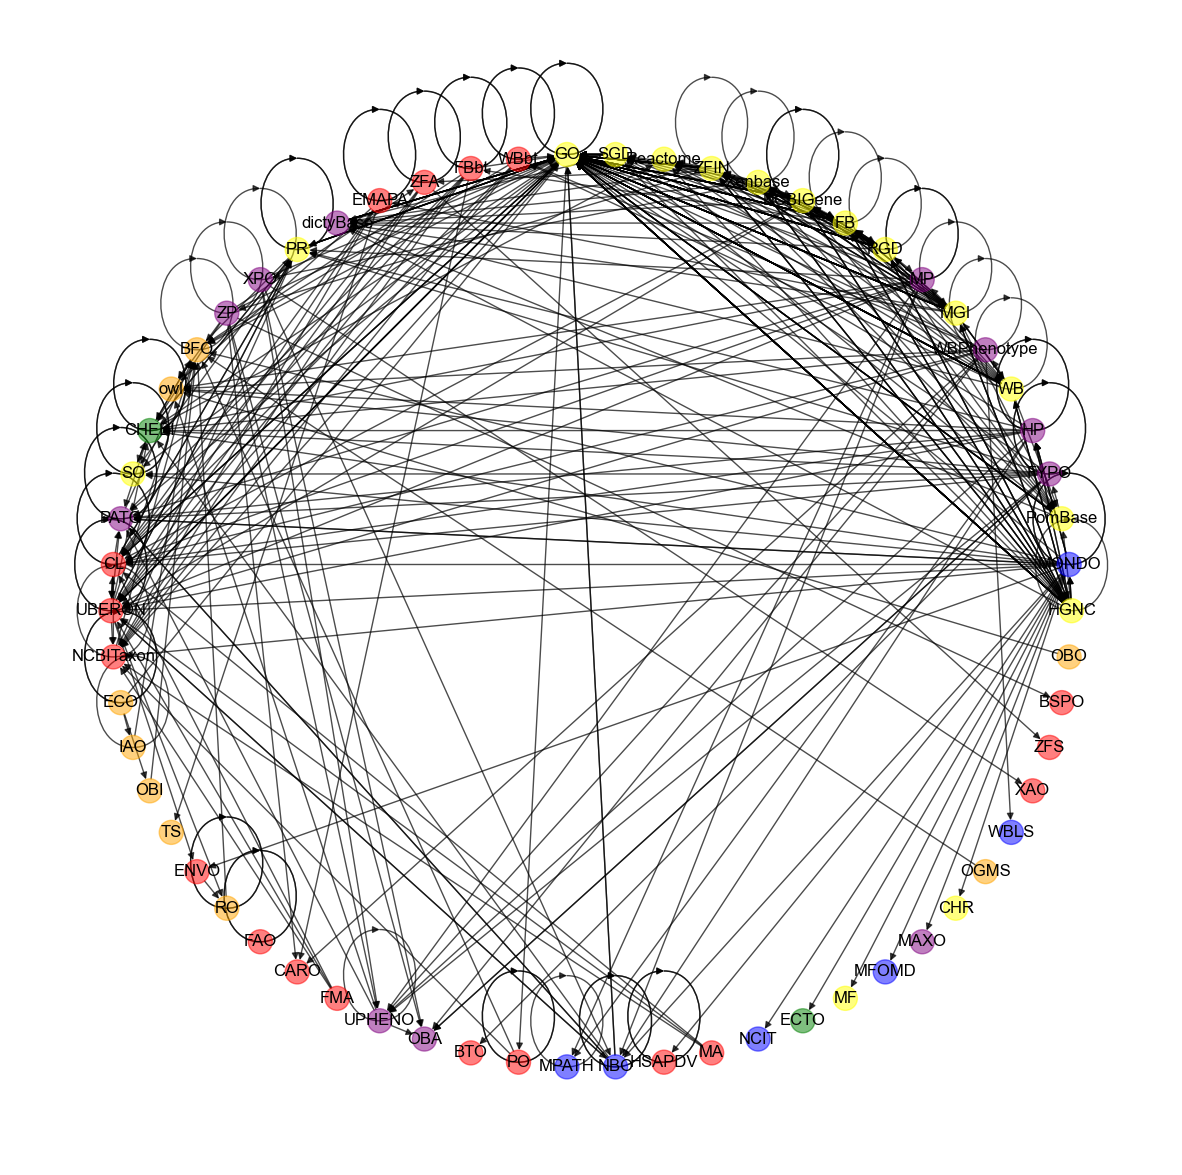

In [11]:
# plot the graph
plt.figure(figsize=(15,15))
# use circular layout
pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G, )

# pos['WBPhenotype'] = [-0.26680138, -0.40139563]
# pos['ZFA'] = [ 0.40056946, -0.51841956]
# pos['MONDO'] = [ 0.00765793, -0.33716435]
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'grey', 'black']
types = list(set([type_to_label[x][1] for x in type_to_label.keys()]))
types.sort()
# assign each type a color
type_colors = { x:colors[i] for i, x in enumerate(types)}

color_map = { x:type_colors[type_to_label[x][1] ]for x in type_to_label.keys()}
node_colors = [color_map[x] for x in G.nodes()]
print(type_colors)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color=node_colors, alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1, alpha=.7, edge_color='#000000', arrows=True,)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='arial')
# add edge labels
# edge_labels = nx.get_edge_attributes(G,'predicate')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)


plt.axis('off')
# save as svg
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('monarch_kg.svg', format='svg', dpi=300)
plt.show()
